<a href="https://colab.research.google.com/github/swasjn/hackathon-2k22/blob/main/hacky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascular disease.csv to cardiovascular disease (3).csv


In [207]:
import io
content = pd.read_csv(io.BytesIO(uploaded['cardiovascular disease.csv']), sep=";")

In [208]:
content.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [209]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [210]:
type (content)

pandas.core.frame.DataFrame

In [211]:
#adding BMI column 
content['BMI'] = np.round((content['weight'] / ((content['height']/ 100)**2)), 2)

In [212]:
#removing ap_hi anomalies
content_2=content.drop(content.index[content['ap_hi']>150])

In [213]:
#removing ap_hi anomalies
content_2=content_2.drop(content_2.index[content_2['ap_hi']<50])

In [214]:
#removing ap_lo anomalies
content_2=content_2.drop(content_2.index[content_2['ap_lo']>150])

In [215]:
#removing ap_lo anomalies
content_2=content_2.drop(content_2.index[content_2['ap_lo']<50])

In [216]:
#removing ap_lo anomalies
content_2=content_2.drop(content_2.index[content_2['BMI']>100])

In [217]:
final_content=content_2

In [218]:
final_content['ap_hi'].value_counts()

120    27649
140     9322
130     8906
110     8630
150     4199
100     2577
90       977
125      437
145      227
115      218
135      208
80       102
105       64
128       34
95        33
127       23
123       22
141       20
112       20
117       20
138       18
124       17
126       16
148       16
122       16
136       15
113       15
118       15
134       15
70        14
132       14
147       13
119       13
121       12
143       12
114       11
149       10
85        10
106       10
144       10
131       10
139       10
102        9
111        9
108        9
103        9
116        9
109        9
146        9
133        8
137        8
142        8
107        7
104        6
129        6
101        4
99         4
96         2
93         1
97         1
Name: ap_hi, dtype: int64

In [219]:
final_content['ap_lo'].value_counts()

80     34246
90     12843
70     10141
60      2687
100     2208
       ...  
121        1
104        1
115        1
125        1
54         1
Name: ap_lo, Length: 66, dtype: int64

In [220]:
final_content.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000,64098.000000
mean,49977.383756,19406.963493,1.346189,164.427673,73.593303,123.749181,80.365269,1.347749,1.219180,0.086867,0.052170,0.803239,0.468517,27.264531
std,28857.293550,2472.751459,0.475758,7.961122,13.967901,12.999893,8.594246,0.667452,0.566742,0.281642,0.222372,0.397553,0.499012,5.172927
min,0.000000,10798.000000,1.000000,76.000000,11.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.470000
25%,24987.250000,17592.000000,1.000000,159.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.810000
50%,50058.500000,19667.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.170000
75%,74895.500000,21281.000000,2.000000,170.000000,81.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.860000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,150.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,95.220000


In [221]:
#changing column names
final_content = final_content.rename(columns={'age' : 'age in days'})
final_content = final_content.rename(columns={'gender' : 'sex'})
final_content = final_content.rename(columns={'ap_hi' : 'syst_bp'})
final_content = final_content.rename(columns={'ap_lo' : 'diast_bp'})
final_content = final_content.rename(columns={'cardio' : 'cardiovas'})

In [222]:
content['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [223]:
final_content['sex'].value_counts()

1    41908
2    22190
Name: sex, dtype: int64

In [224]:
final_content['syst_bp'].value_counts()

120    27649
140     9322
130     8906
110     8630
150     4199
100     2577
90       977
125      437
145      227
115      218
135      208
80       102
105       64
128       34
95        33
127       23
123       22
141       20
112       20
117       20
138       18
124       17
126       16
148       16
122       16
136       15
113       15
118       15
134       15
70        14
132       14
147       13
119       13
121       12
143       12
114       11
149       10
85        10
106       10
144       10
131       10
139       10
102        9
111        9
108        9
103        9
116        9
109        9
146        9
133        8
137        8
142        8
107        7
104        6
129        6
101        4
99         4
96         2
93         1
97         1
Name: syst_bp, dtype: int64

In [225]:
final_content['diast_bp'].value_counts()

80     34246
90     12843
70     10141
60      2687
100     2208
       ...  
121        1
104        1
115        1
125        1
54         1
Name: diast_bp, Length: 66, dtype: int64

In [226]:
final_content['cholesterol'].value_counts()

1    48816
2     8274
3     7008
Name: cholesterol, dtype: int64

In [227]:
final_content['gluc'].value_counts()

1    54858
3     4809
2     4431
Name: gluc, dtype: int64

In [228]:
final_content['smoke'].value_counts()

0    58530
1     5568
Name: smoke, dtype: int64

In [229]:
final_content['alco'].value_counts()

0    60754
1     3344
Name: alco, dtype: int64

In [230]:
final_content['active'].value_counts()

1    51486
0    12612
Name: active, dtype: int64

In [231]:
final_content['cardiovas'].value_counts()

0    34067
1    30031
Name: cardiovas, dtype: int64

In [232]:
final_content.head()

,id,age in days,sex,height,weight,syst_bp,diast_bp,cholesterol,gluc,smoke,alco,active,cardiovas,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [233]:
#adding age in years column
final_content['age in years'] = np.round((final_content['age in days']/ 365), 0)

In [234]:
final_content.head()

,id,age in days,sex,height,weight,syst_bp,diast_bp,cholesterol,gluc,smoke,alco,active,cardiovas,BMI,age in years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,48.0


In [235]:
final_content['age in years'].value_counts()

54.0    5485
56.0    5446
58.0    5173
50.0    4934
60.0    4884
52.0    4860
62.0    3466
64.0    3393
48.0    2976
46.0    2775
44.0    2675
40.0    2596
42.0    2501
55.0    1368
53.0    1308
57.0    1302
51.0    1240
59.0    1235
61.0    1096
49.0     990
63.0     899
41.0     731
45.0     707
47.0     696
43.0     654
39.0     390
65.0     314
30.0       4
Name: age in years, dtype: int64

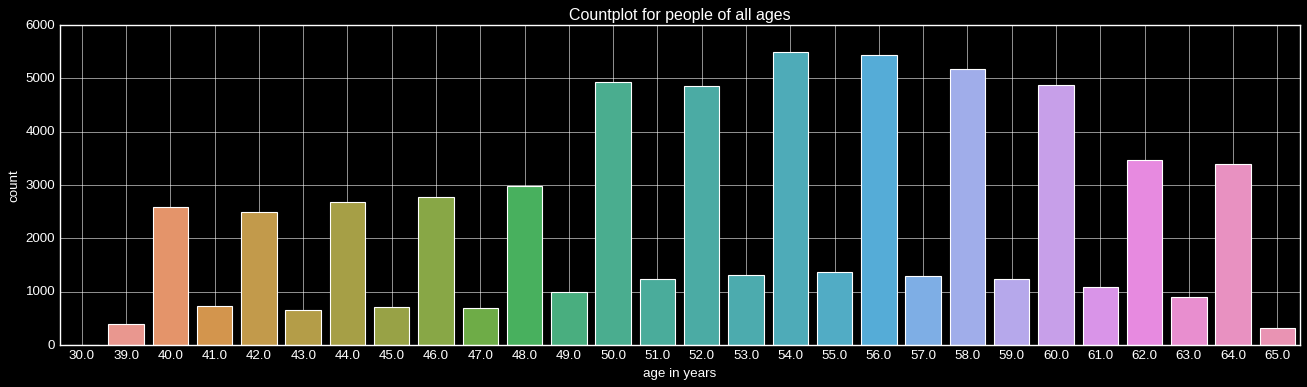

In [236]:
#DataFrame for people of all ages (30 to 56).
import seaborn as sns
year_df=final_content[final_content['age in years']>29]
#count plot for people of all ages (30 to 56).
plt.figure(figsize=(20,5))
plt.title("Countplot for people of all ages")
sns.countplot(x='age in years', data=year_df)
plt.grid()
plt.show()

In [237]:
final_content["cholesterol"].value_counts()

1    48816
2     8274
3     7008
Name: cholesterol, dtype: int64

In [238]:
#creating dataframe with people with cardiovascular disease
cardiovas_true=final_content[final_content['cardiovas']==1]
cardiovas_true.head()

,id,age in days,sex,height,weight,syst_bp,diast_bp,cholesterol,gluc,smoke,alco,active,cardiovas,BMI,age in years
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.98,62.0
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1,37.86,46.0


In [239]:
cardiovas_true['cardiovas'].value_counts()

1    30031
Name: cardiovas, dtype: int64

In [240]:
#creating dataframe with women with cardiovascular disease
women_df=cardiovas_true[cardiovas_true['sex']==1]
women_df.head()

,id,age in days,sex,height,weight,syst_bp,diast_bp,cholesterol,gluc,smoke,alco,active,cardiovas,BMI,age in years
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,52.0
22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1,36.05,63.0
24,35,16608,1,170,68.0,150,90,3,1,0,0,1,1,23.53,46.0
30,42,18291,1,155,105.0,120,80,3,1,0,0,1,1,43.70,50.0


In [241]:
women_df['cardiovas'].value_counts()

1    19593
Name: cardiovas, dtype: int64

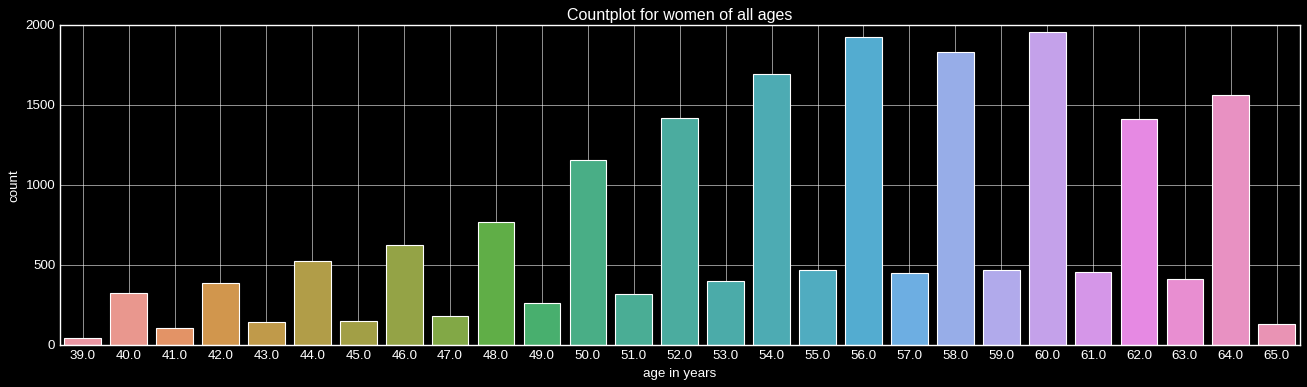

In [242]:
women_cardiovas_df=women_df[women_df['age in years']>29]
#count plot for women of all ages (30 to 56).
plt.figure(figsize=(20,5))
plt.title("Countplot for women of all ages")
sns.countplot(x='age in years', data=women_cardiovas_df)
plt.grid()
plt.show()

In [243]:
#creating dataframe with men with cardiovascular disease
men_df=cardiovas_true[cardiovas_true['sex']==2]
men_df.head()

,id,age in days,sex,height,weight,syst_bp,diast_bp,cholesterol,gluc,smoke,alco,active,cardiovas,BMI,age in years
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.98,62.0
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1,37.86,46.0
34,46,21940,2,173,82.0,140,90,3,1,0,0,0,1,27.40,60.0
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,27.43,64.0


In [244]:
men_df['cardiovas'].value_counts()

1    10438
Name: cardiovas, dtype: int64

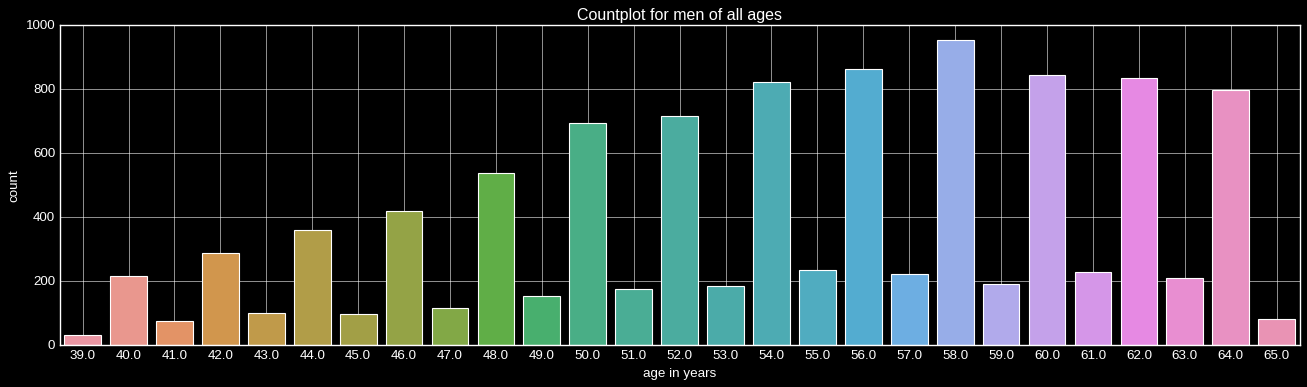

In [245]:
men_cardiovas_df=men_df[men_df['age in years']>29]
#count plot for men of all ages (30 to 56).
plt.figure(figsize=(20,5))
plt.title("Countplot for men of all ages")
sns.countplot(x='age in years', data=men_cardiovas_df)
plt.grid()
plt.show()

In [246]:
#finding percentage of women with cardiovascular disease
total_women=final_content[final_content['sex']==1]
total_women['sex'].value_counts()
tw=total_women['sex'].value_counts()
tw=int(tw) #total women in dataset 

wc=women_df['sex'].value_counts()
wc=int(wc) #total women with cardiovas 

percent_women=np.round((wc/tw)*100, 2)
print(f'{percent_women}% women from this dataset have cardiovascular disease.')

#finding percentage of men with cardiovascular disease
total_men=final_content[final_content['sex']==2]
total_men['sex'].value_counts()
tm=total_men['sex'].value_counts()
tm=int(tm) #total men in dataset 

mc=men_df['sex'].value_counts()
mc=int(mc) #total men with cardiovas 

percent_men=np.round((mc/tm)*100, 2)
print(f'{percent_men}% men from this dataset have cardiovascular disease.')

46.75% women from this dataset have cardiovascular disease.
47.04% men from this dataset have cardiovascular disease.


From this dataset it can be infered that men have a slightly higher probability of contracting cardiovascular disease. 


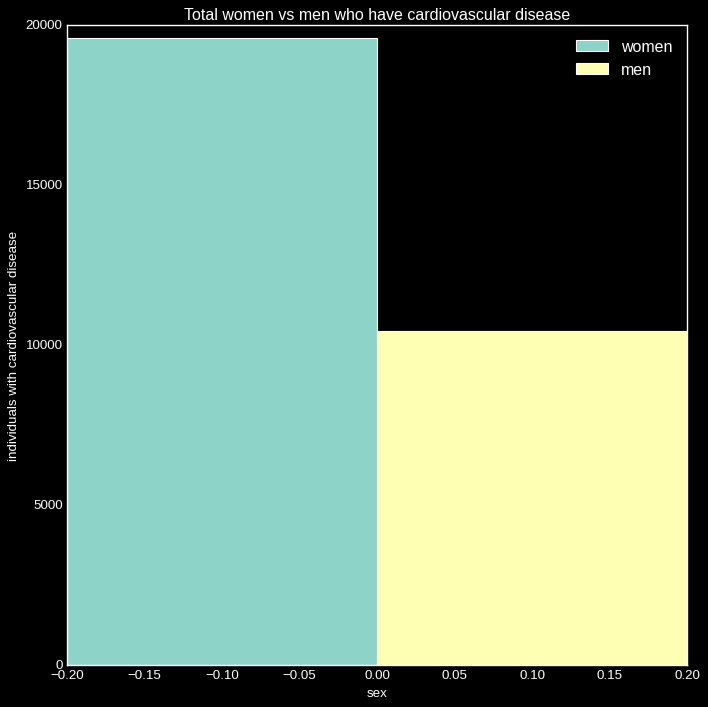

In [247]:
#graph showing the number of women and men with cardiovascular disease in the dataset
bar_width=0.2
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
plt.bar(x=np.arange(1)-bar_width/2, height=wc, width=bar_width, align='center', label='women')
plt.bar(x=np.arange(1)+bar_width/2, height=mc, width=bar_width, align='center', label='men')
plt.xlabel('sex')
plt.ylabel('individuals with cardiovascular disease')
plt.title('Total women vs men who have cardiovascular disease')
plt.legend()
plt.show()

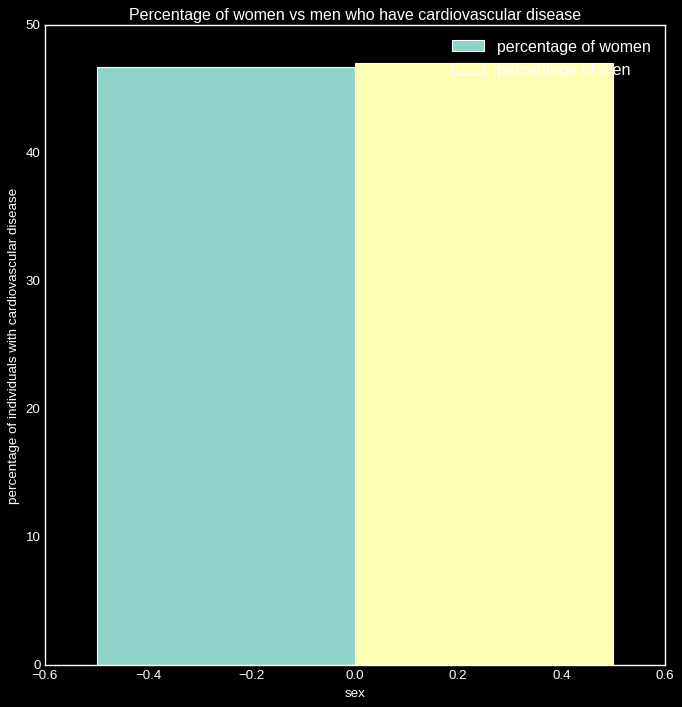

In [248]:
#graph showing the percentage of women and men with cardiovascular disease in the dataset
bar_width=0.5
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.bar(x=np.arange(1)-bar_width/2, height=percent_women, width=bar_width, align='center', label='percentage of women')
plt.bar(x=np.arange(1)+bar_width/2, height=percent_men, width=bar_width, align='center', label='percentage of men')
plt.xlabel('sex')
plt.ylabel('percentage of individuals with cardiovascular disease')
plt.title('Percentage of women vs men who have cardiovascular disease')
plt.legend()
plt.show()

In [249]:
cw=women_df['cholesterol'].value_counts()
cw

1    12826
3     3686
2     3081
Name: cholesterol, dtype: int64

In [250]:
cm=men_df['cholesterol'].value_counts()
cm

1    7285
3    1579
2    1574
Name: cholesterol, dtype: int64

In [251]:
#cholesterol percentage
total_chol_wc_1= women_df[women_df['cholesterol']==1] #women with cardiovascular disease whose cholesterol level: norm 
chol_wc_1=total_chol_wc_1['cholesterol'].value_counts()
chol_wc_1=int(chol_wc_1)

percent_women_chol_1=np.round((chol_wc_1/wc)*100, 2)
print(f'{percent_women_chol_1}% women from this dataset with cardiovascular disease fall in the healthy range of cholesterol levels')

total_chol_wc_2= women_df[women_df['cholesterol']==2] #women with cardiovascular disease whose cholesterol level: unhealthy 
chol_wc_2=total_chol_wc_2['cholesterol'].value_counts()
chol_wc_2=int(chol_wc_2)

percent_women_chol_2=np.round((chol_wc_2/wc)*100, 2)
print(f'{percent_women_chol_2}% women from this dataset with cardiovascular disease fall in the unhealthy range of cholesterol levels')

total_chol_wc_3= women_df[women_df['cholesterol']==3] #women with cardiovascular disease whose cholesterol level: extreme 
chol_wc_3=total_chol_wc_3['cholesterol'].value_counts()
chol_wc_3=int(chol_wc_3)

percent_women_chol_3=np.round((chol_wc_3/wc)*100, 2)
print(f'{percent_women_chol_3}% women from this dataset with cardiovascular disease fall in the extremely unhealthy range of cholesterol levels')

65.46% women from this dataset with cardiovascular disease fall in the healthy range of cholesterol levels
15.73% women from this dataset with cardiovascular disease fall in the unhealthy range of cholesterol levels
18.81% women from this dataset with cardiovascular disease fall in the extremely unhealthy range of cholesterol levels


In [252]:
#cholesterol percentage
total_chol_mc_1= men_df[men_df['cholesterol']==1] #men with cardiovascular disease whose cholesterol level: norm 
chol_mc_1=total_chol_mc_1['cholesterol'].value_counts()
chol_mc_1=int(chol_mc_1)

percent_men_chol_1=np.round((chol_mc_1/mc)*100, 2)
print(f'{percent_men_chol_1}% men from this dataset with cardiovascular disease fall in the healthy range of cholesterol levels')

total_chol_mc_2= men_df[men_df['cholesterol']==2] #men with cardiovascular disease whose cholesterol level: unhealthy 
chol_mc_2=total_chol_mc_2['cholesterol'].value_counts()
chol_mc_2=int(chol_mc_2)

percent_men_chol_2=np.round((chol_mc_2/mc)*100, 2)
print(f'{percent_men_chol_2}% men from this dataset with cardiovascular disease fall in the unhealthy range of cholesterol levels')

total_chol_mc_3= men_df[men_df['cholesterol']==3] #men with cardiovascular disease whose cholesterol level: extreme 
chol_mc_3=total_chol_mc_3['cholesterol'].value_counts()
chol_mc_3=int(chol_mc_3)

percent_men_chol_3=np.round((chol_mc_3/mc)*100, 2)
print(f'{percent_men_chol_3}% men from this dataset with cardiovascular disease fall in the extremely unhealthy range of cholesterol levels')

69.79% men from this dataset with cardiovascular disease fall in the healthy range of cholesterol levels
15.08% men from this dataset with cardiovascular disease fall in the unhealthy range of cholesterol levels
15.13% men from this dataset with cardiovascular disease fall in the extremely unhealthy range of cholesterol levels


In [253]:
chol_lvl=['normal', 'above normal', 'well above normal']

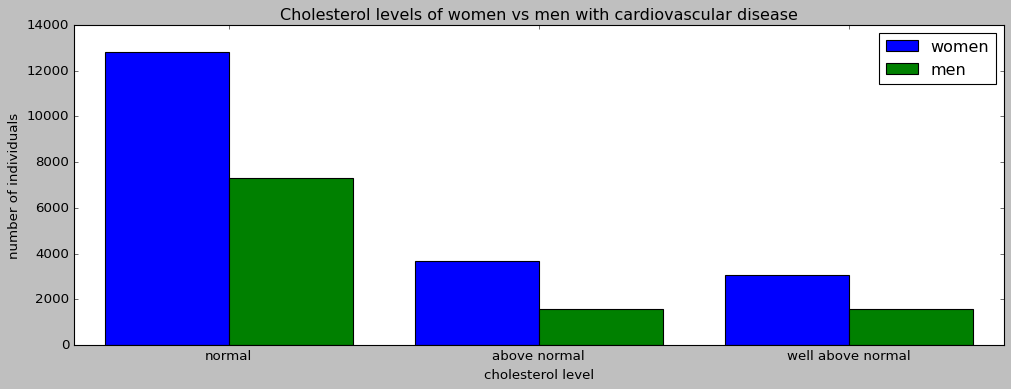

In [254]:
#graph comparing the cholestrol levels of women and men with cardiovascular disease
bar_width=0.4
plt.style.use('classic')
plt.figure(figsize=(15,5))
plt.title('Cholesterol levels of women vs men with cardiovascular disease')
plt.bar(x=np.arange(1,4)-bar_width/2, height=cw, width=bar_width, align='center', label='women')
plt.bar(x=np.arange(1,4)+bar_width/2, height=cm, width=bar_width, align='center', label='men')
plt.xlabel('cholesterol level')
plt.ylabel('number of individuals')
plt.xticks(ticks=np.arange(1,4), labels=chol_lvl)
plt.legend()
plt.show()

In [255]:
sw=women_df['smoke'].value_counts()
sw

0    19263
1      330
Name: smoke, dtype: int64

In [256]:
sm=men_df['smoke'].value_counts()
sm

0    8359
1    2079
Name: smoke, dtype: int64

In [257]:
idk=women_df['sex']==1
idk.value_counts()

True    19593
Name: sex, dtype: int64

In [258]:
#total women with cardiovascular disease
wc

19593

In [259]:
#smoking percentage
total_smoke_wc= women_df[women_df['smoke']==1] #women with cardiovascular disease who smoke 
smoke_wc=total_smoke_wc['smoke'].value_counts()
smoke_wc=int(smoke_wc)

percent_women_smoke=np.round((smoke_wc/wc)*100, 2)
print(f'{percent_women_smoke}% women from this dataset with cardiovascular disease smoke.')


total_smoke_mc= men_df[men_df['smoke']==1] #men with cardiovascular disease who smoke 
smoke_mc=total_smoke_mc['smoke'].value_counts()
smoke_mc=int(smoke_mc)

percent_men_smoke=np.round((smoke_mc/mc)*100, 2)
print(f'{percent_men_smoke}% men from this dataset with cardiovascular disease smoke.')

1.68% women from this dataset with cardiovascular disease smoke.
19.92% men from this dataset with cardiovascular disease smoke.


In [260]:
smoking_list=["don't smoke", "smoke"]

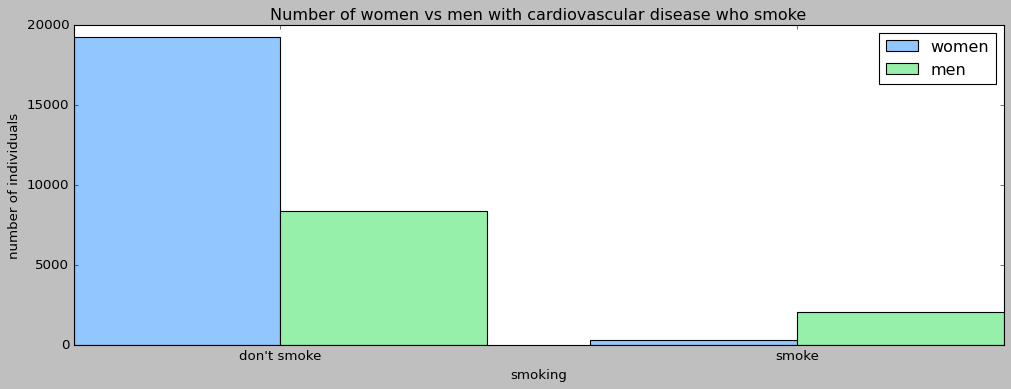

In [261]:
#smoking women vs men 
bar_width=0.4
plt.style.use('seaborn-pastel')
plt.figure(figsize=(15,5))
plt.title('Number of women vs men with cardiovascular disease who smoke')
plt.bar(x=np.arange(0,2)-bar_width/2, height=sw, width=bar_width, align='center', label='women')
plt.bar(x=np.arange(0,2)+bar_width/2, height=sm, width=bar_width, align='center', label='men')
plt.xlabel('smoking')
plt.ylabel('number of individuals')
plt.xticks(ticks=np.arange(0,2), labels=smoking_list)
plt.legend()
plt.show()

In [262]:
smoking_list=["don't smoke","smoke"]

In [263]:
#alcohol percentage
total_alco_wc= women_df[women_df['alco']==1] #women with cardiovascular disease who drink alcohol 
alco_wc=total_alco_wc['alco'].value_counts()
alco_wc=int(alco_wc)

percent_women_alco=np.round((alco_wc/wc)*100, 2)
print(f'{percent_women_alco}% women from this dataset with cardiovascular disease drink alcohol .')


total_alco_mc= men_df[men_df['alco']==1] #men with cardiovascular disease who drink alcohol  
alco_mc=total_alco_mc['alco'].value_counts()
alco_mc=int(alco_mc)

percent_men_alco=np.round((alco_mc/mc)*100, 2)
print(f'{percent_men_alco}% men from this dataset with cardiovascular disease drink alcohol .')

2.45% women from this dataset with cardiovascular disease drink alcohol .
9.48% men from this dataset with cardiovascular disease drink alcohol .


In [264]:
alco_list=["don't drink alcohol", "drink alcohol"]

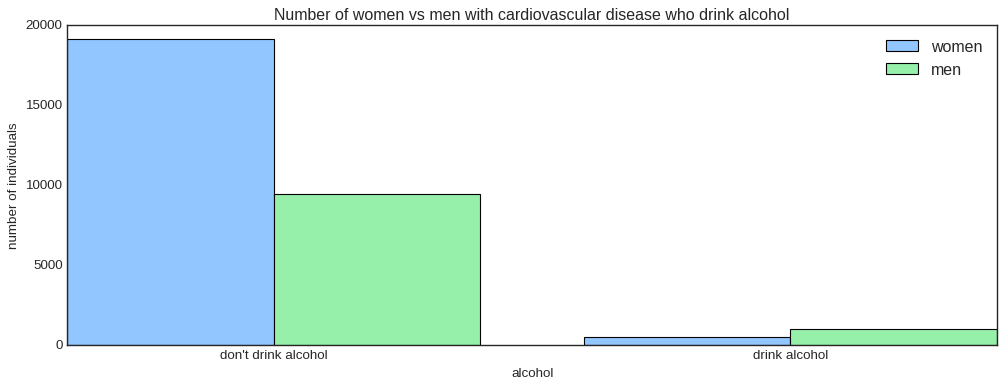

In [265]:
#alcohol
aw=women_df['alco'].value_counts()
am=men_df['alco'].value_counts()
#graph 
bar_width=0.4
plt.style.use('seaborn-white')
plt.figure(figsize=(15,5))
plt.bar(x=np.arange(0,2)-bar_width/2, height=aw, width=bar_width, align='center', label='women')
plt.bar(x=np.arange(0,2)+bar_width/2, height=am, width=bar_width, align='center', label='men')
plt.xlabel('alcohol')
plt.ylabel('number of individuals')
plt.xticks(ticks=np.arange(0,2), labels=alco_list)
plt.title('Number of women vs men with cardiovascular disease who drink alcohol')
plt.legend()
plt.show()

In [266]:
#blood glucose percentage
total_gluc_wc_1= women_df[women_df['gluc']==1] #women with cardiovascular disease whose glucose level: norm 
gluc_wc_1=total_gluc_wc_1['gluc'].value_counts()
gluc_wc_1=int(gluc_wc_1)

percent_women_gluc_1=np.round((gluc_wc_1/wc)*100, 2)
print(f'{percent_women_gluc_1}% women from this dataset with cardiovascular disease fall in the healthy range of blood glucose levels')

total_gluc_wc_2= women_df[women_df['gluc']==2] #women with cardiovascular disease whose glucose level: unhealthy 
gluc_wc_2=total_gluc_wc_2['gluc'].value_counts()
gluc_wc_2=int(gluc_wc_2)

percent_women_gluc_2=np.round((gluc_wc_2/wc)*100, 2)
print(f'{percent_women_gluc_2}% women from this dataset with cardiovascular disease fall in the unhealthy range of blood glucose levels')

total_gluc_wc_3= women_df[women_df['gluc']==3] #women with cardiovascular disease whose glucose level: extreme 
gluc_wc_3=total_gluc_wc_3['gluc'].value_counts()
gluc_wc_3=int(gluc_wc_3)

percent_women_gluc_3=np.round((gluc_wc_3/wc)*100, 2)
print(f'{percent_women_gluc_3}% women from this dataset with cardiovascular disease fall in the extremely unhealthy range of blood glucose levels')

81.48% women from this dataset with cardiovascular disease fall in the healthy range of blood glucose levels
8.12% women from this dataset with cardiovascular disease fall in the unhealthy range of blood glucose levels
10.4% women from this dataset with cardiovascular disease fall in the extremely unhealthy range of blood glucose levels


In [267]:
#blood glucose percentage
total_gluc_mc_1= men_df[men_df['gluc']==1] #men with cardiovascular disease whose glucose level: norm 
gluc_mc_1=total_gluc_mc_1['gluc'].value_counts()
gluc_mc_1=int(gluc_mc_1)

percent_men_gluc_1=np.round((gluc_mc_1/mc)*100, 2)
print(f'{percent_men_gluc_1}% men from this dataset with cardiovascular disease fall in the healthy range of blood glucose levels')

total_gluc_mc_2= men_df[men_df['gluc']==2] #men with cardiovascular disease whose glucose level: unhealthy 
gluc_mc_2=total_gluc_mc_2['gluc'].value_counts()
gluc_mc_2=int(gluc_mc_2)

percent_men_gluc_2=np.round((gluc_mc_2/mc)*100, 2)
print(f'{percent_men_gluc_2}% men from this dataset with cardiovascular disease fall in the unhealthy range of blood glucose levels')

total_gluc_mc_3= men_df[men_df['gluc']==3] #men with cardiovascular disease whose glucose level: extreme  
gluc_mc_3=total_gluc_mc_3['gluc'].value_counts()
gluc_mc_3=int(gluc_mc_3)

percent_men_gluc_3=np.round((gluc_mc_3/mc)*100, 2)
print(f'{percent_men_gluc_3}% men from this dataset with cardiovascular disease fall in the extremely unhealthy range of blood glucose levels')

83.77% men from this dataset with cardiovascular disease fall in the healthy range of blood glucose levels
8.11% men from this dataset with cardiovascular disease fall in the unhealthy range of blood glucose levels
8.12% men from this dataset with cardiovascular disease fall in the extremely unhealthy range of blood glucose levels


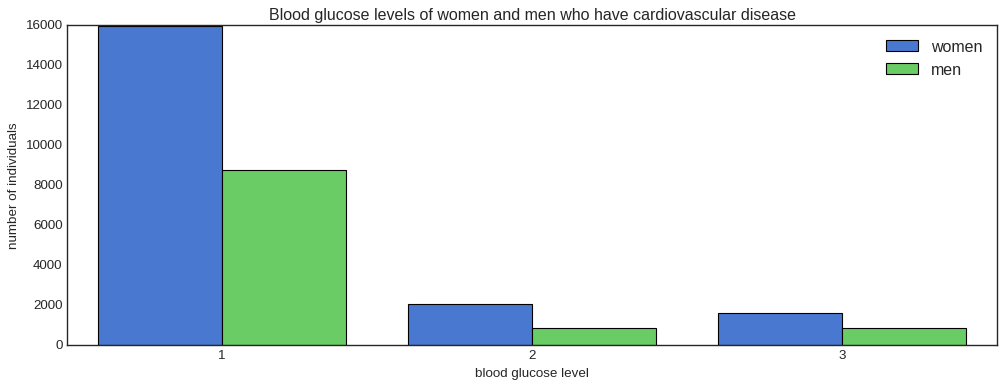

In [268]:
#glucose
gw=women_df['gluc'].value_counts()
gm=men_df['gluc'].value_counts()

#graph 
bar_width=0.4
plt.style.use('seaborn-muted')
plt.figure(figsize=(15,5))
plt.title('Blood glucose levels of women and men who have cardiovascular disease')
plt.bar(x=np.arange(1,4)-bar_width/2, height=gw, width=bar_width, align='center', label='women')
plt.bar(x=np.arange(1,4)+bar_width/2, height=gm, width=bar_width, align='center', label='men')
plt.xlabel('blood glucose level')
plt.ylabel('number of individuals')
plt.xticks(ticks=np.arange(1,4))
plt.legend()
plt.show()

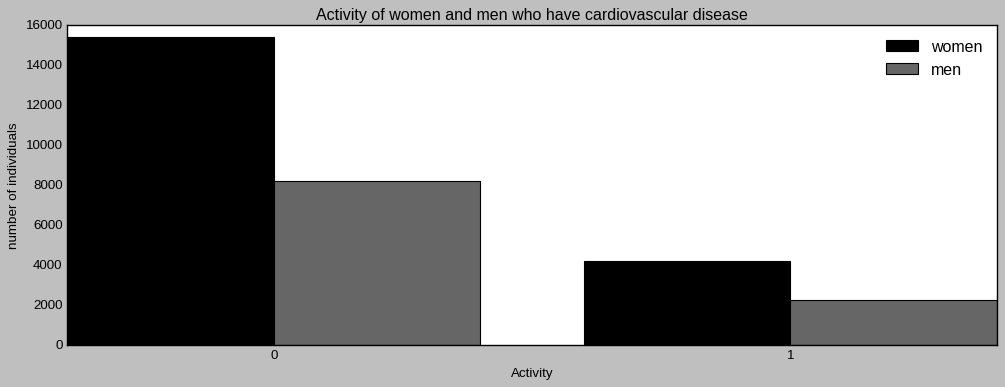

In [269]:
#activity
actw=women_df['active'].value_counts()
actm=men_df['active'].value_counts()

#graph 
bar_width=0.4
plt.style.use('grayscale')
plt.figure(figsize=(15,5))
plt.title('Activity of women and men who have cardiovascular disease')
plt.bar(x=np.arange(0,2)-bar_width/2, height=actw, width=bar_width, align='center', label='women')
plt.bar(x=np.arange(0,2)+bar_width/2, height=actm, width=bar_width, align='center', label='men')
plt.xlabel('Activity')
plt.ylabel('number of individuals')
plt.xticks(ticks=np.arange(0,2))
plt.legend()
plt.show()

In [270]:
total_bmi_wc_1= women_df[(women_df['BMI']<=24.9) & (women_df['BMI']>=18.5)] #women with cardiovascular disease whose BMI: norm 
bmi_wc_1=total_bmi_wc_1['BMI'].value_counts().sum()
bmi_wc_1

5588

In [271]:
#bmi percentage
total_bmi_wc_1= women_df[(women_df['BMI']<=24.9) & (women_df['BMI']>=18.5)] #women with cardiovascular disease whose BMI: norm 
bmi_wc_1=total_bmi_wc_1['BMI'].value_counts().sum()

percent_women_bmi_1=np.round((bmi_wc_1/wc)*100, 2)
print(f'{percent_women_bmi_1}% women from this dataset with cardiovascular disease fall in the healthy range of BMI')

total_bmi_wc_2= women_df[women_df['BMI']<18.5] #women with cardiovascular disease whose BMI: unhealthy 
bmi_wc_2=total_bmi_wc_2['BMI'].value_counts().sum()

percent_women_bmi_2=np.round((bmi_wc_2/wc)*100, 2)
print(f'{percent_women_bmi_2}% women from this dataset with cardiovascular disease fall in the unhealthy (under weight) range of BMI')

total_bmi_wc_3= women_df[women_df['BMI']>24.9] #women with cardiovascular disease whose BMI: extreme 
bmi_wc_3=total_bmi_wc_3['BMI'].value_counts().sum()

percent_women_bmi_3=np.round((bmi_wc_3/wc)*100, 2)
print(f'{percent_women_bmi_3}% women from this dataset with cardiovascular disease fall in the unhealthy (over weight) range of BMI')

28.52% women from this dataset with cardiovascular disease fall in the healthy range of BMI
0.56% women from this dataset with cardiovascular disease fall in the unhealthy (under weight) range of BMI
70.92% women from this dataset with cardiovascular disease fall in the unhealthy (over weight) range of BMI


In [272]:
#bmi percentage
total_bmi_mc_1= men_df[(men_df['BMI']<=24.9) & (men_df['BMI']>=18.5)] #men with cardiovascular disease whose BMI: norm 
bmi_mc_1=total_bmi_mc_1['BMI'].value_counts().sum()

percent_men_bmi_1=np.round((bmi_mc_1/mc)*100, 2)
print(f'{percent_men_bmi_1}% men from this dataset with cardiovascular disease fall in the healthy range of BMI')

total_bmi_mc_2= men_df[men_df['BMI']<18.5] #men with cardiovascular disease whose BMI: unhealthy 
bmi_mc_2=total_bmi_mc_2['BMI'].value_counts().sum()

percent_men_bmi_2=np.round((bmi_mc_2/mc)*100, 2)
print(f'{percent_men_bmi_2}% men from this dataset with cardiovascular disease fall in the unhealthy (under weight) range of BMI')

total_bmi_mc_3= men_df[men_df['BMI']>24.9] #men with cardiovascular disease whose BMI: extreme 
bmi_mc_3=total_bmi_mc_3['BMI'].value_counts().sum()

percent_men_bmi_3=np.round((bmi_mc_3/mc)*100, 2)
print(f'{percent_men_bmi_3}% men from this dataset with cardiovascular disease fall in the unhealthy (over weight) range of BMI')

32.06% men from this dataset with cardiovascular disease fall in the healthy range of BMI
0.55% men from this dataset with cardiovascular disease fall in the unhealthy (under weight) range of BMI
67.4% men from this dataset with cardiovascular disease fall in the unhealthy (over weight) range of BMI


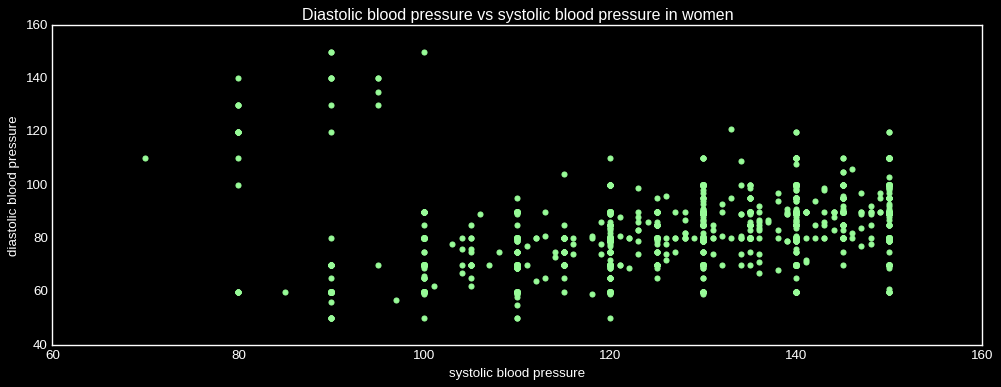

In [273]:
#scatter plot for diast vs syst in women
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
plt.scatter(women_df['syst_bp'], women_df['diast_bp'], color='palegreen')
plt.xlabel('systolic blood pressure')
plt.ylabel('diastolic blood pressure')
plt.title('Diastolic blood pressure vs systolic blood pressure in women')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


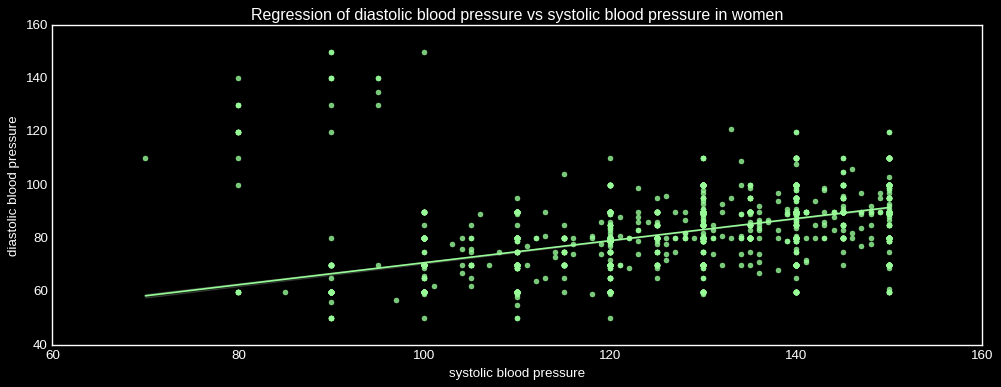

In [274]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
sns.regplot(women_df['syst_bp'], women_df['diast_bp'], color='palegreen')
plt.xlabel('systolic blood pressure')
plt.ylabel('diastolic blood pressure')
plt.title('Regression of diastolic blood pressure vs systolic blood pressure in women')
plt.show()

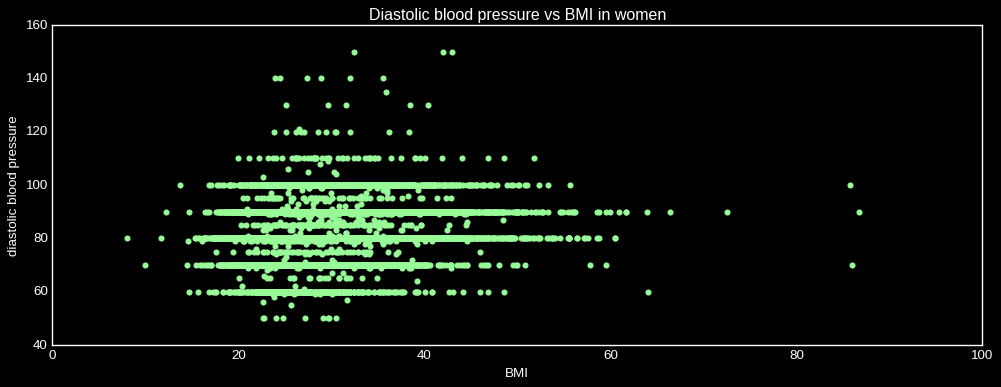

In [275]:
#scatter plot for diast vs bmi
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
plt.scatter(women_df['BMI'], women_df['diast_bp'], color='palegreen')
plt.xlabel('BMI')
plt.ylabel('diastolic blood pressure')
plt.title('Diastolic blood pressure vs BMI in women')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


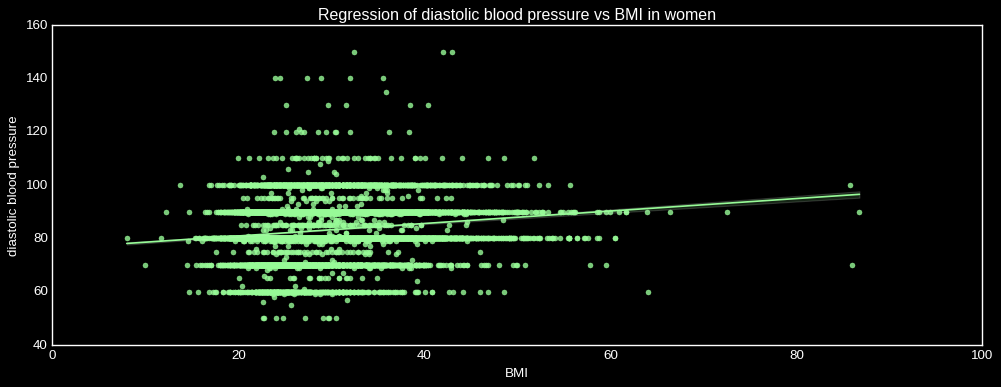

In [276]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
sns.regplot(women_df['BMI'], women_df['diast_bp'], color='palegreen')
plt.xlabel('BMI')
plt.ylabel('diastolic blood pressure')
plt.title('Regression of diastolic blood pressure vs BMI in women')
plt.show()

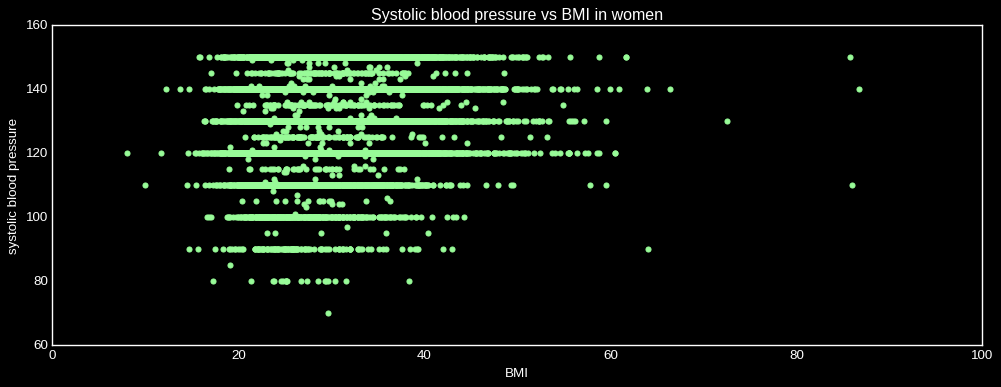

In [277]:
#scatter plot for syst vs bmi
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
plt.scatter(women_df['BMI'], women_df['syst_bp'], color='palegreen')
plt.xlabel('BMI')
plt.ylabel('systolic blood pressure')
plt.title('Systolic blood pressure vs BMI in women')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


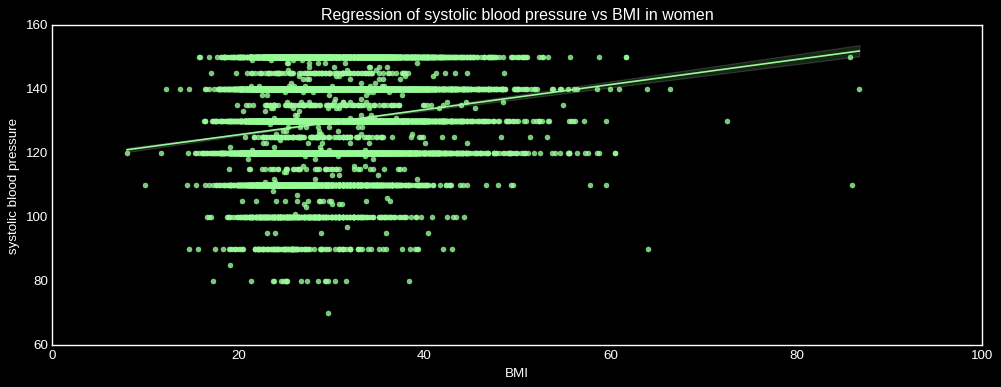

In [278]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
sns.regplot(women_df['BMI'], women_df['syst_bp'], color='palegreen')
plt.xlabel('BMI')
plt.ylabel('systolic blood pressure')
plt.title('Regression of systolic blood pressure vs BMI in women')
plt.show()

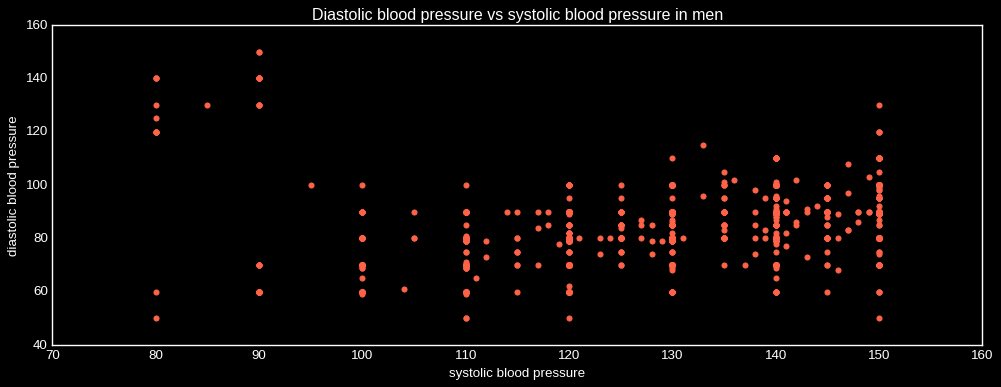

In [279]:
#scatter plot for diast vs syst in men
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
plt.scatter(men_df['syst_bp'], men_df['diast_bp'], color='tomato')
plt.xlabel('systolic blood pressure')
plt.ylabel('diastolic blood pressure')
plt.title('Diastolic blood pressure vs systolic blood pressure in men')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


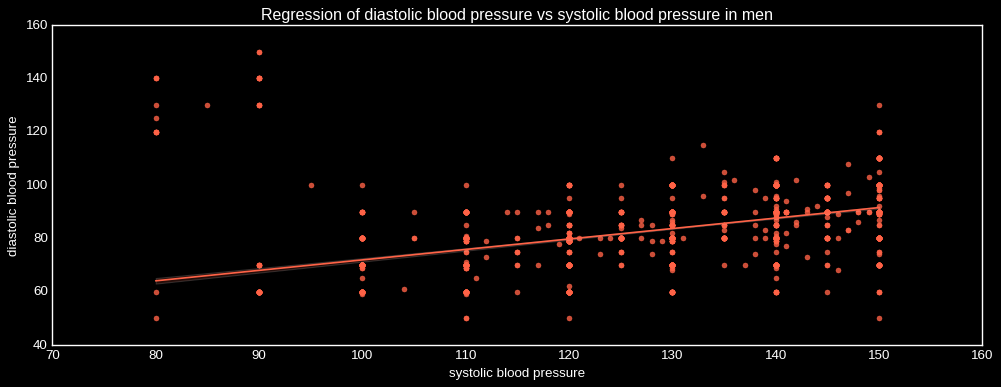

In [280]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
sns.regplot(men_df['syst_bp'], men_df['diast_bp'], color='tomato')
plt.xlabel('systolic blood pressure')
plt.ylabel('diastolic blood pressure')
plt.title('Regression of diastolic blood pressure vs systolic blood pressure in men')
plt.show()

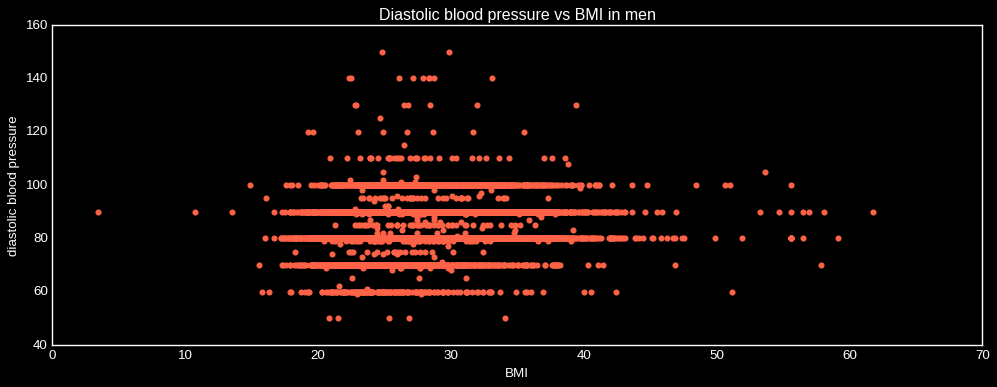

In [281]:
#scatter plot for diast vs bmi
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
plt.scatter(men_df['BMI'], men_df['diast_bp'], color='tomato')
plt.xlabel('BMI')
plt.ylabel('diastolic blood pressure')
plt.title('Diastolic blood pressure vs BMI in men')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


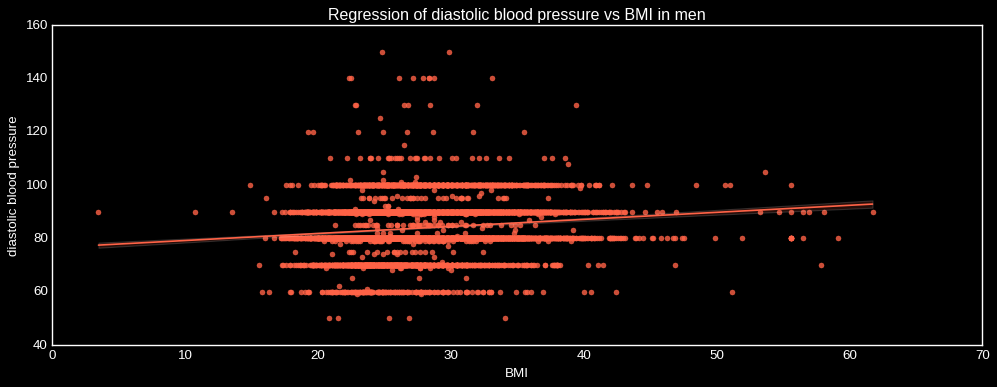

In [282]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
sns.regplot(men_df['BMI'], men_df['diast_bp'], color='tomato')
plt.xlabel('BMI')
plt.ylabel('diastolic blood pressure')
plt.title('Regression of diastolic blood pressure vs BMI in men')
plt.show()

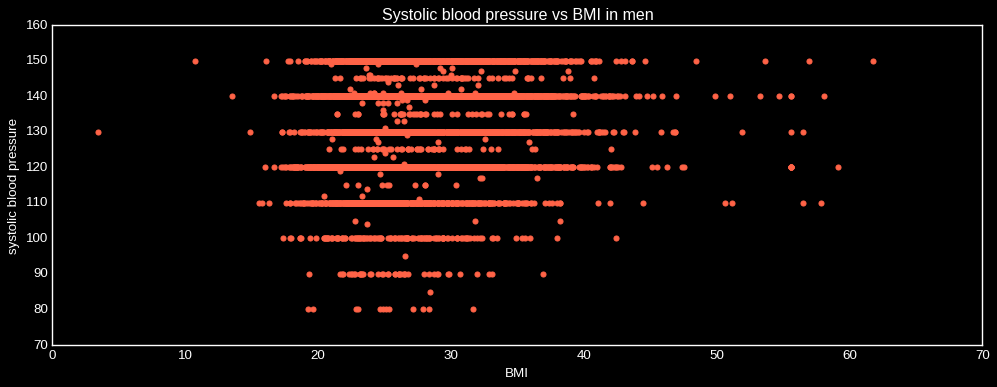

In [283]:
#scatter plot for syst vs bmi
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
plt.scatter(men_df['BMI'], men_df['syst_bp'], color='tomato')
plt.xlabel('BMI')
plt.ylabel('systolic blood pressure')
plt.title('Systolic blood pressure vs BMI in men')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


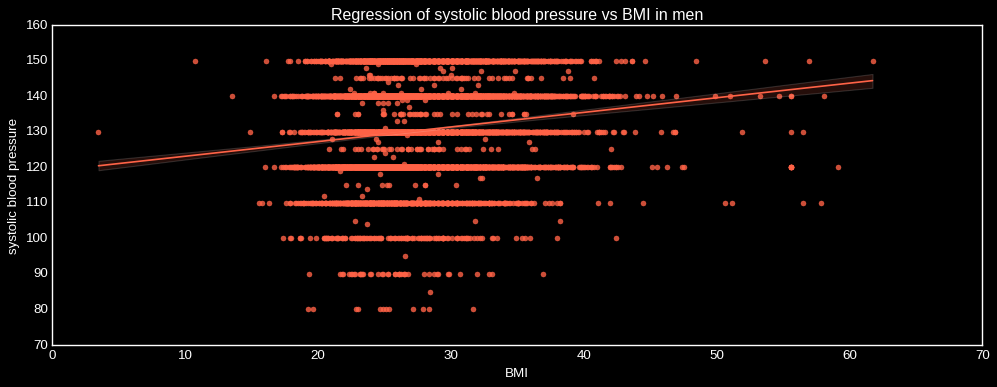

In [284]:

plt.figure(figsize=(15, 5))
sns.regplot(men_df['BMI'], men_df['syst_bp'], color='tomato')
plt.xlabel('BMI')
plt.ylabel('systolic blood pressure')
plt.title('Regression of systolic blood pressure vs BMI in men')
plt.show()

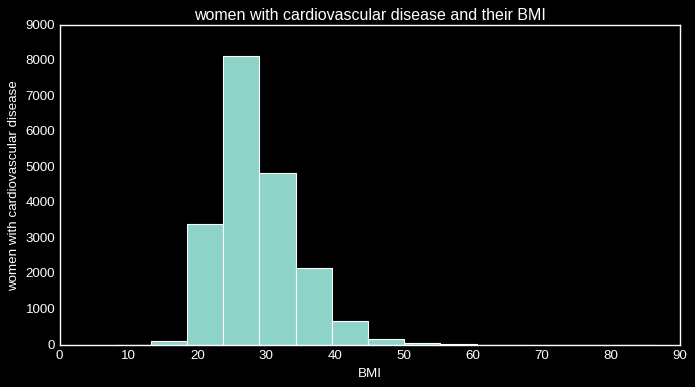

In [285]:
#histogram of women with cardiovascular disease and thier bmi
plt.figure(figsize=(10,5))
plt.hist(women_df['BMI'],bins=15)
plt.xlabel('BMI')
plt.ylabel('women with cardiovascular disease')
plt.title('women with cardiovascular disease and their BMI')
plt.show()

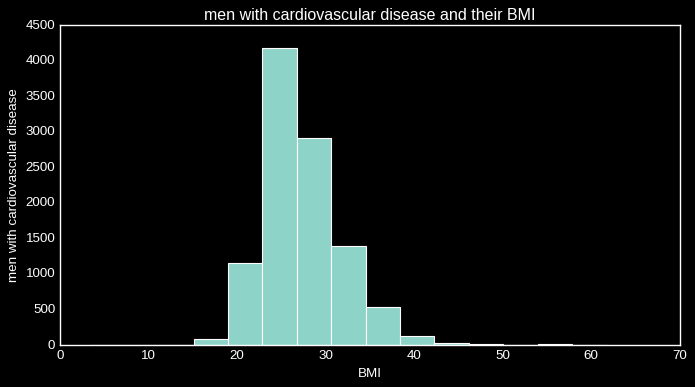

In [286]:
#histogram of men with cardiovascular disease and thier bmi
plt.figure(figsize=(10,5))
plt.hist(men_df['BMI'],bins=15)
plt.xlabel('BMI')
plt.ylabel('men with cardiovascular disease')
plt.title('men with cardiovascular disease and their BMI')
plt.show()